In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/BIVARIADO"
directorios_de_datos="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/DATA"

In [46]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado.csv")

In [47]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Job Title                     2253 non-null   object 
 1   Salary Estimate               2253 non-null   object 
 2   Rating                        2253 non-null   float64
 3   Company Name                  2253 non-null   object 
 4   Location                      2253 non-null   object 
 5   Headquarters                  2253 non-null   object 
 6   Size                          2253 non-null   object 
 7   Founded                       2253 non-null   int64  
 8   Type of ownership             2253 non-null   object 
 9   Industry                      2253 non-null   object 
 10  Sector                        2253 non-null   object 
 11  Revenue                       2253 non-null   object 
 12  Salary Estimate Min           2253 non-null   float64
 13  Sal

In [49]:
nominales=['Size','Type of ownership','Revenue']
for i in nominales:
    df[i] = df[i].astype('category')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Job Title                     2253 non-null   object  
 1   Salary Estimate               2253 non-null   object  
 2   Rating                        2253 non-null   float64 
 3   Company Name                  2253 non-null   object  
 4   Location                      2253 non-null   object  
 5   Headquarters                  2253 non-null   object  
 6   Size                          2253 non-null   category
 7   Founded                       2253 non-null   int64   
 8   Type of ownership             2253 non-null   category
 9   Industry                      2253 non-null   object  
 10  Sector                        2253 non-null   object  
 11  Revenue                       2253 non-null   category
 12  Salary Estimate Min           2253 non-null   fl

In [51]:
df['Size'].value_counts()

Size
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
Unknown                    205
5001 to 10000 employees     97
Name: count, dtype: int64

In [52]:
razon=['Rating','Sentences in Job Description','Salary Estimate Mean']


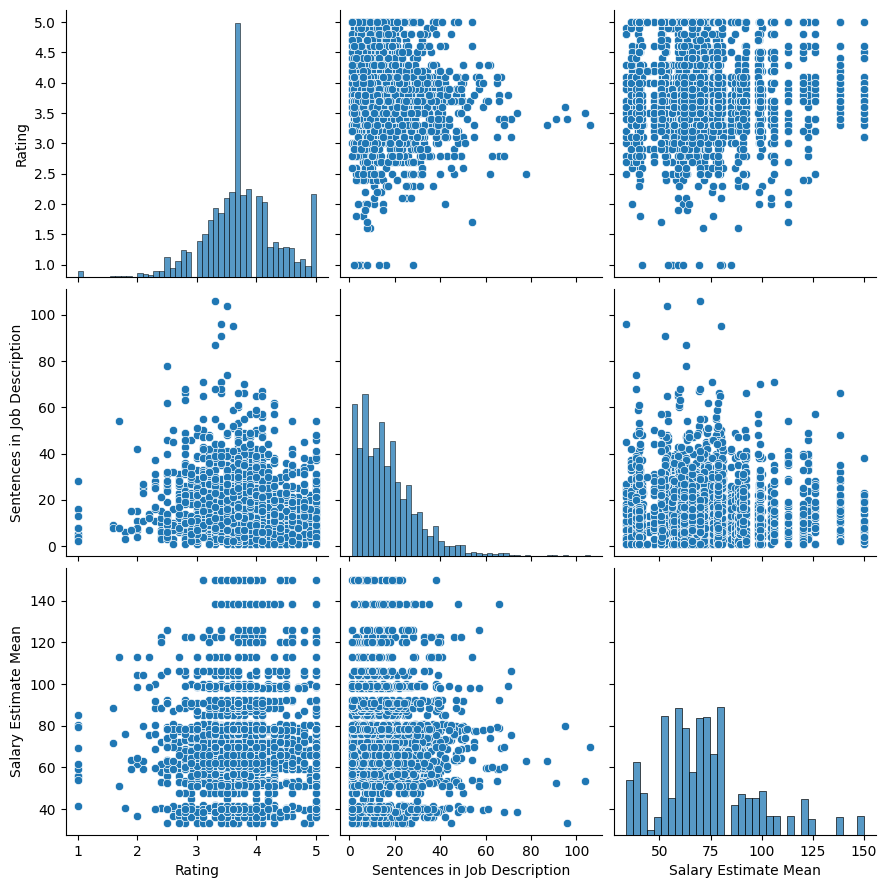

In [53]:
sns.pairplot(data=df[razon[0:len(razon)]], height=3)
save_image_file="pair_plot"
plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')


In [54]:
#Usar numeric only.
df_dum=df[razon]
cov = df_dum.cov(numeric_only = True).round(2)

In [55]:
cov

,Rating,Sentences in Job Description,Salary Estimate Mean
Rating,0.40,-1.02,0.59
Sentences in Job Description,-1.02,175.58,-6.11
Salary Estimate Mean,0.59,-6.11,556.75


In [56]:
#plt.figure(figsize=(30, 30))
#plt.rcParams['font.size'] = '20'
#sns.heatmap(cov, annot=True,cmap="BuPu", robust=True,annot_kws={"fontsize":20})
#plt.show();

In [57]:
import phik # Coeficiente de correlación que funciona bien con variables de todo tipo
from phik import resources, report

In [58]:
pm = df.phik_matrix(interval_cols = razon )

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Company Name is large: 1502. Are you sure this is not an interval variable? Analysis for pairs of variables including Company Name can be slow.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Job Title is large: 1272. Are you sure this is not an interval variable? Analysis for pairs of variables including Job Title can be slow.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 1910544. Are interval variables set correctly?
  warnings.warn(


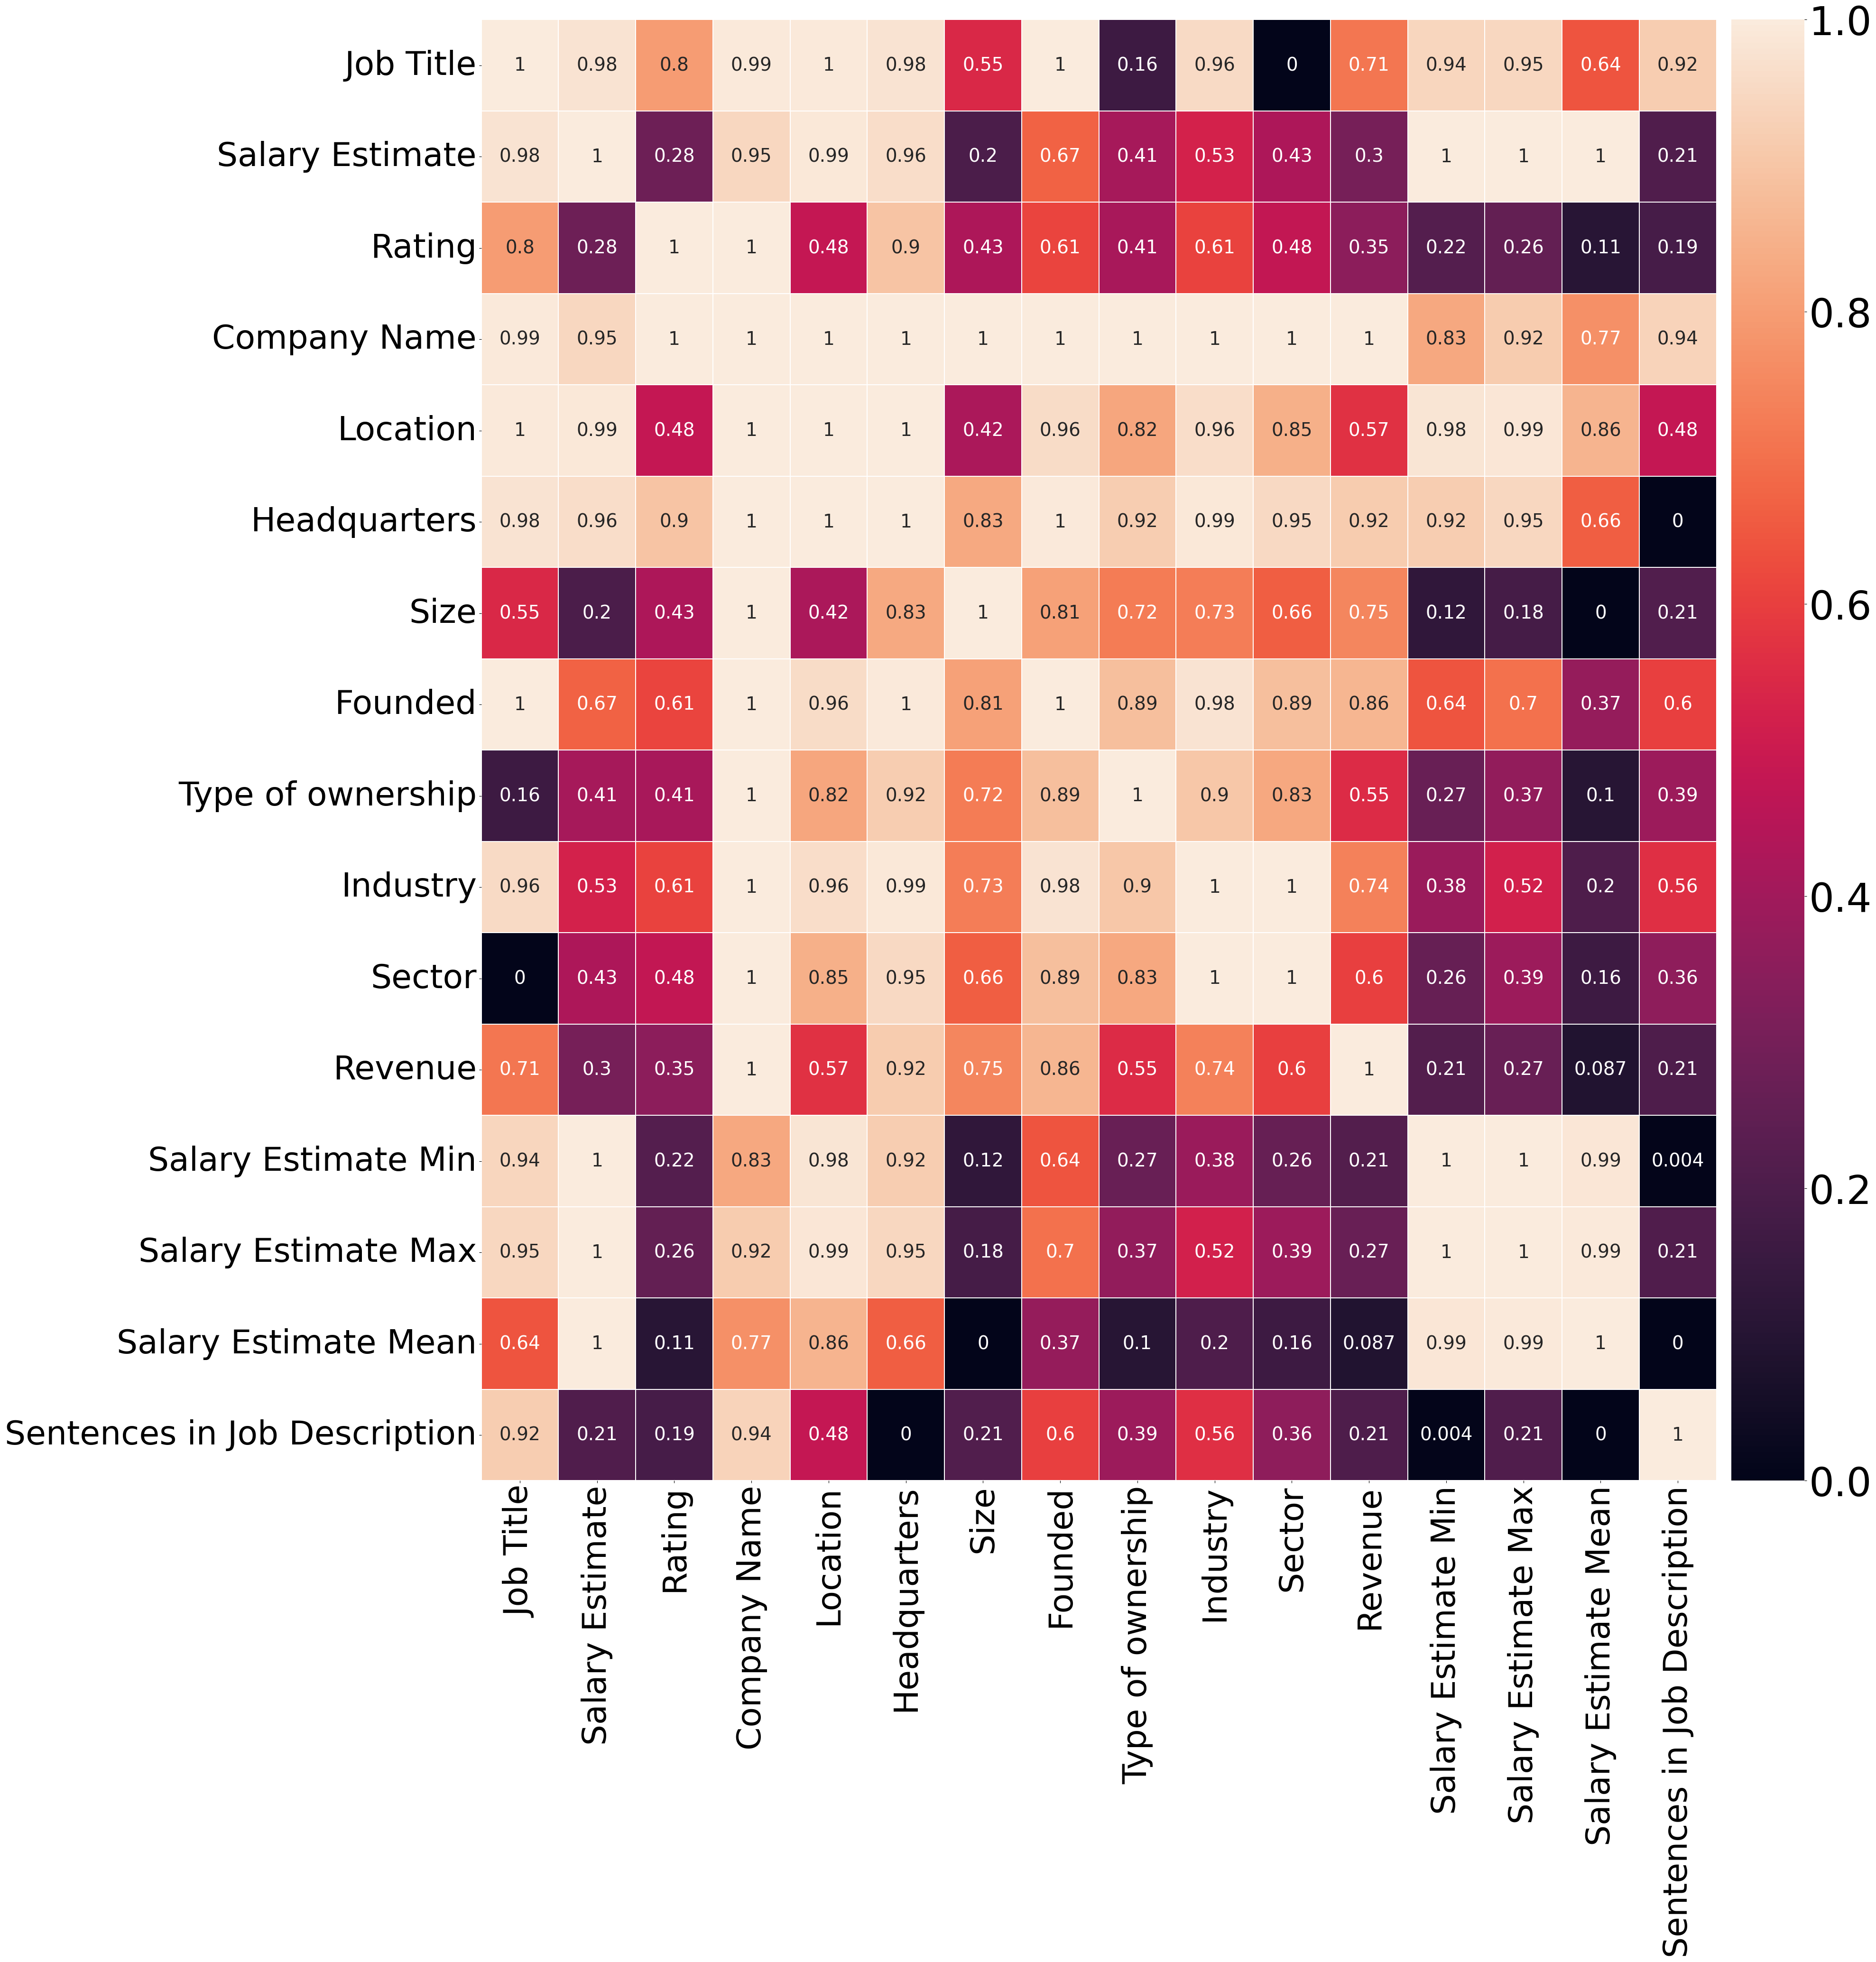

In [59]:
fig,ax = plt.subplots(figsize=(40,40))
res=sns.heatmap(pm.round(3),annot=True,annot_kws={"size":28},linewidths=.3,cbar_kws={"pad": 0.01})
cbar = res.collections[0].colorbar
cbar.ax.tick_params(labelsize=60)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 50)
res.set_yticklabels(res.get_ymajorticklabels(),fontsize=50)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=0)

save_image_file="phik_matrix"
plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show();

In [60]:
sigmp = df.significance_matrix(interval_cols= razon,lambda_='pearson')

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Company Name is large: 1502. Are you sure this is not an interval variable? Analysis for pairs of variables including Company Name can be slow.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Job Title is large: 1272. Are you sure this is not an interval variable? Analysis for pairs of variables including Job Title can be slow.
  warnings.warn(


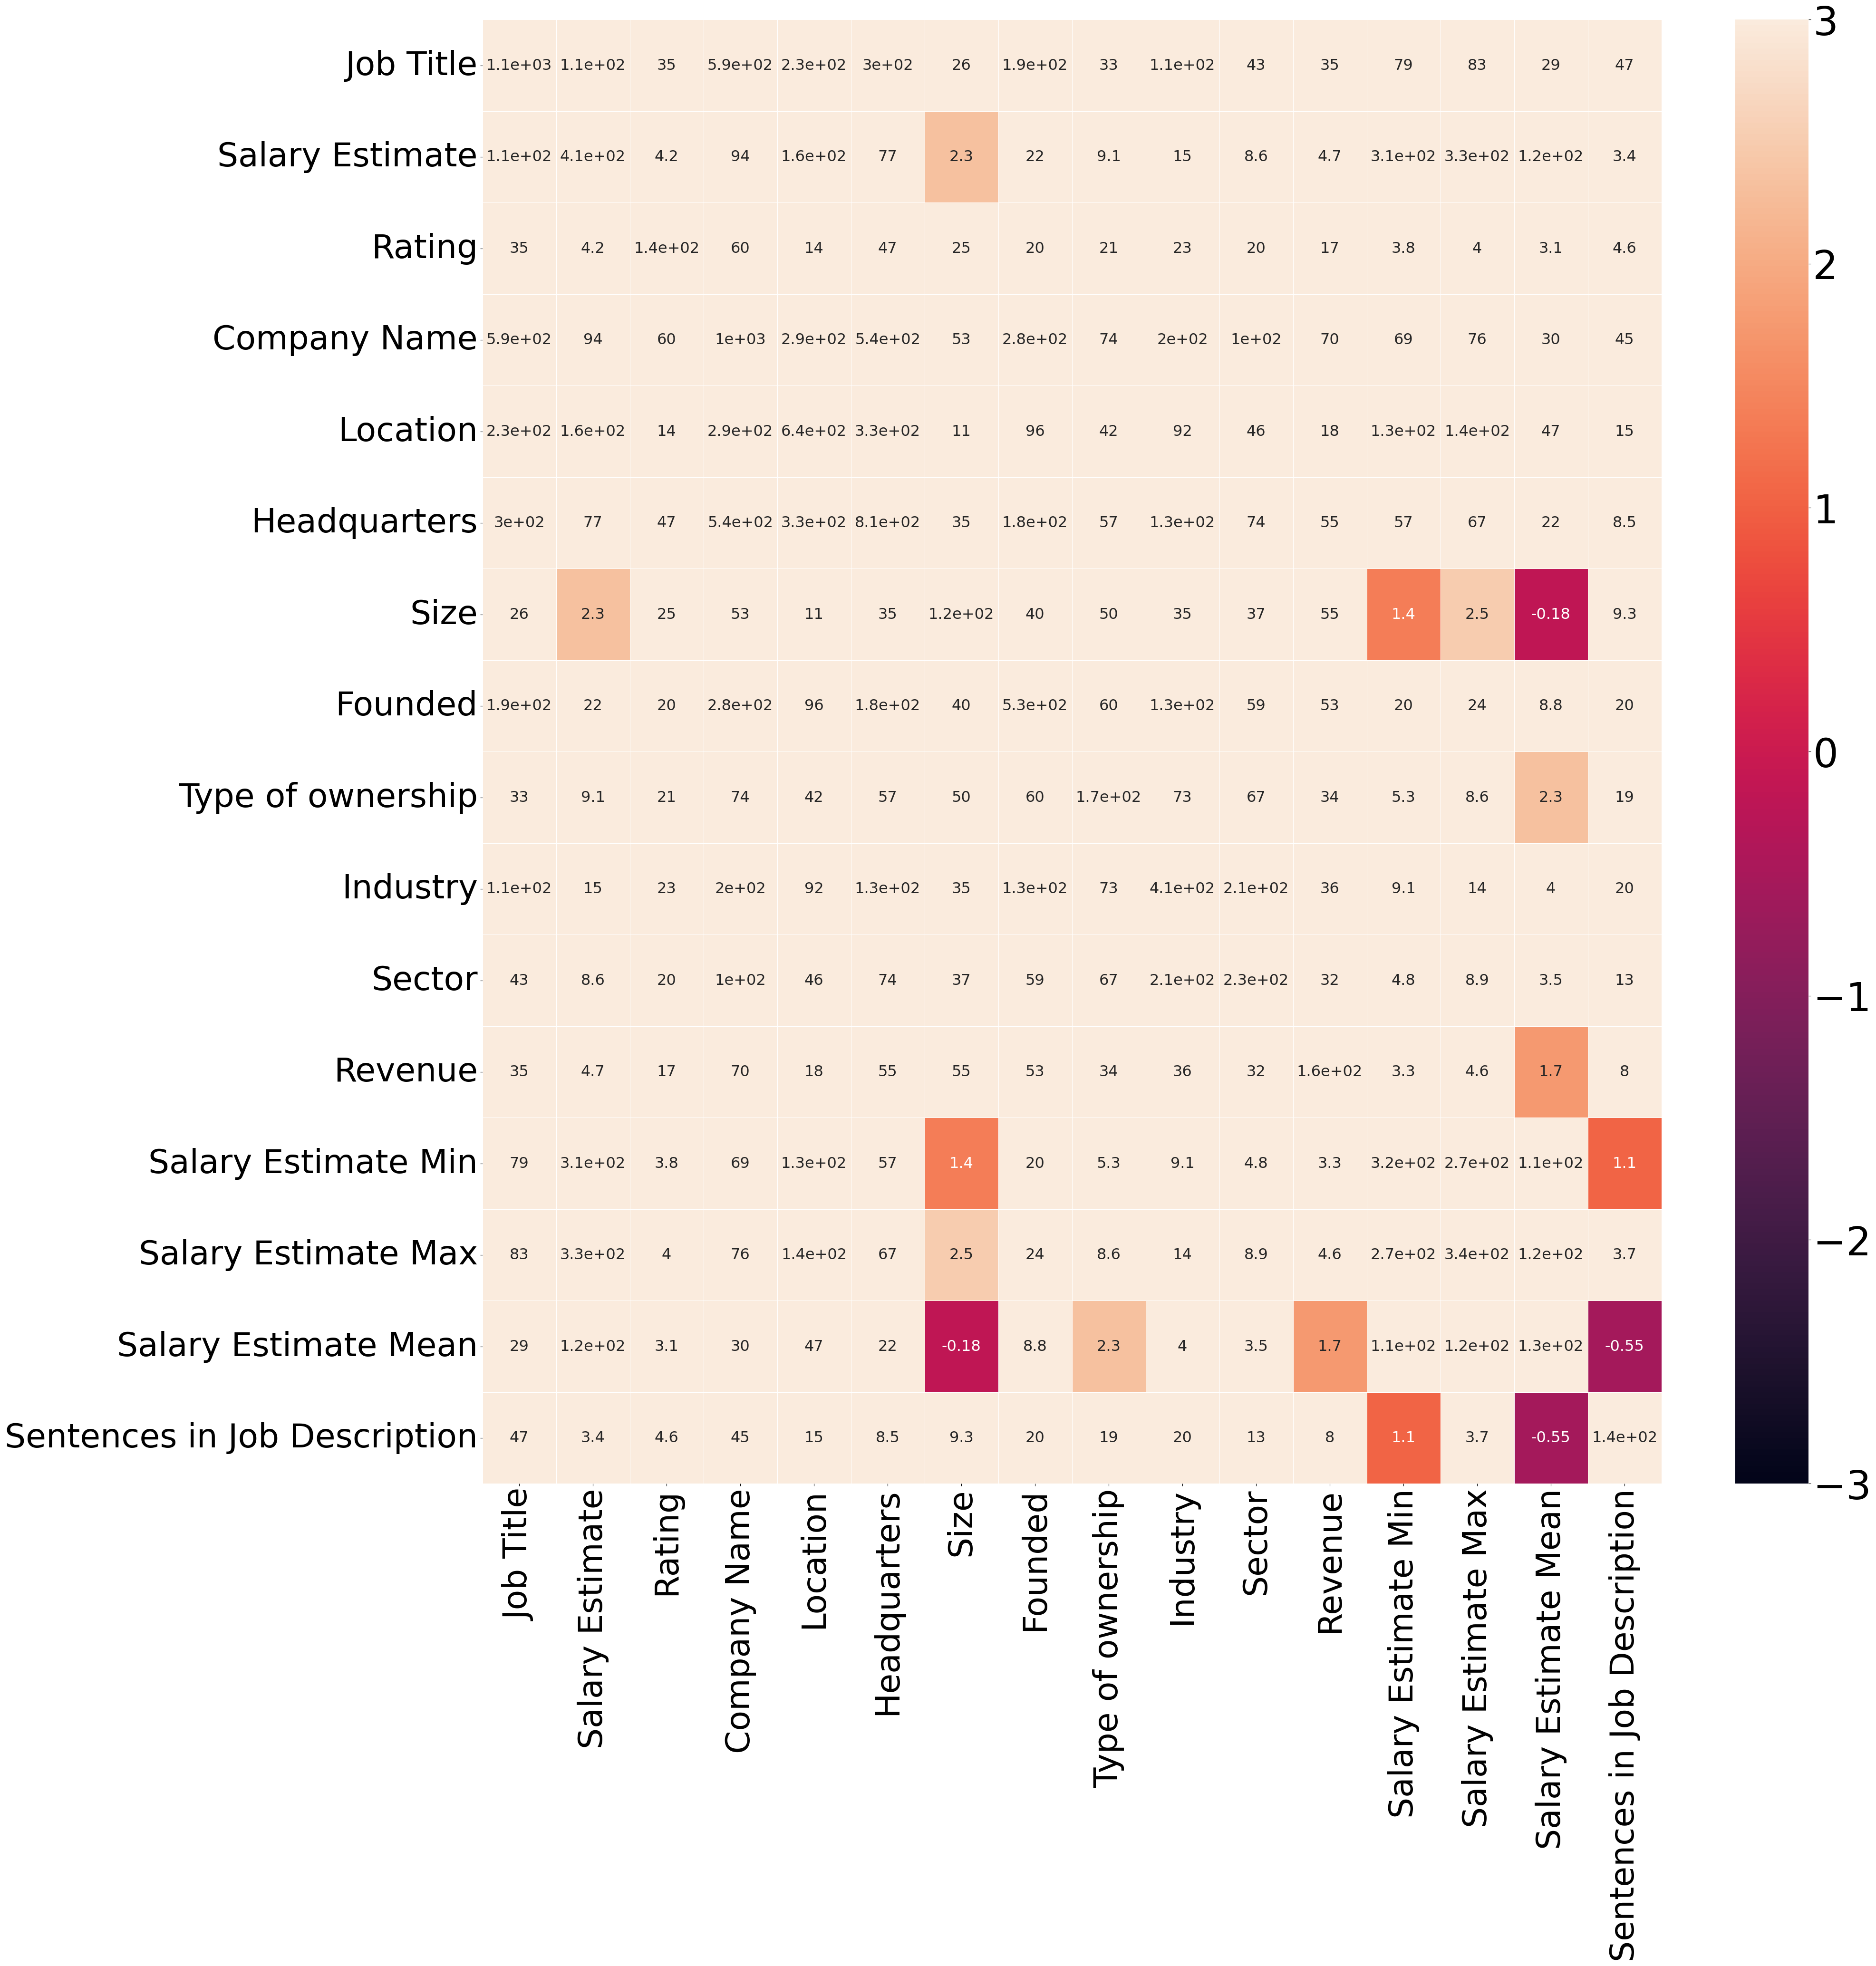

In [61]:
fig,ax = plt.subplots(figsize=(40,40))

# La escala de colores indica el nivel de significancia y se satura a ±3 desviaciones estándar.
vmin = -3
vmax = 3

#vmax = int(sigmp.max().max())
res=sns.heatmap(sigmp.round(2),annot=True,vmin=vmin,vmax=vmax,annot_kws={"size":23},linewidths=.5)
cbar = res.collections[0].colorbar
cbar.ax.tick_params(labelsize=60)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 50)
res.set_yticklabels(res.get_ymajorticklabels(),fontsize=50)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=0)
save_image_file="significancia_matrix"
plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
plt.show();

In [62]:
def compararPhikVSsignificancePorColumna(columna:str,phik_matrix,significance_matrix,p_m_valor_min=0.4,sigMin=1):
    # Utilizar matriz transpuesta para obtener las variables a comparar
    tmp = phik_matrix[[columna]].T

    #Inicializar valores para filas significancia y significante
    # que posteriormente se volveran columnas
    tmp.loc['significancia']=[0.0] * len(tmp.columns)
    tmp.loc['significante']=['No'] * len(tmp.columns)
    
    valores_de_columna=tmp.loc[columna]
    for col in tmp.columns:
        if col == columna:
            continue
        tmp.loc['significancia'][col]=significance_matrix[columna][col]
        if (valores_de_columna[col] >= p_m_valor_min) and\
        (abs(significance_matrix[columna][col]) > sigMin):
            
            tmp.loc['significante'][col]='Yes'
    
    #regresamos los resultados de la matriz tranpuesta
    # para tener valores legibles
    return tmp.T

In [63]:
# Para considerar un valor como significante debe cumplir
# las siguientes condiciones:

# Mayor a este valor en phix_matrix
valor_minimo_valido_phix_matrix=0.4 

# Mayor al valor minimo  en significance_matrix
# en la misma columna
valor_minimo_de_significancia_valido=1
# la informacion para estos valores fue tomada de:
# https://stats.stackexchange.com/questions/497742/making-sense-of-the-phi-k-correlation-coefficient
print("Comparacion phik_matrix vs significance_matrix") 
for columna_a_evaluar in sigmp.columns:
    tmp=compararPhikVSsignificancePorColumna(columna_a_evaluar,pm,sigmp,
                                            p_m_valor_min=valor_minimo_valido_phix_matrix,
                                            sigMin=valor_minimo_de_significancia_valido)
    tmp=tmp[tmp['significante']=='Yes']
    if tmp.empty==False:
        #imprimir solo los valores considerados como significantes
        display(tmp)

Comparacion phik_matrix vs significance_matrix


,Job Title,significancia,significante
Salary Estimate,0.979944,106.99614,Yes
Rating,0.798535,34.697899,Yes
Company Name,0.992963,592.307712,Yes
Location,0.996385,231.272964,Yes
Headquarters,0.978018,301.553009,Yes
Size,0.54609,25.66094,Yes
Founded,0.997159,188.805026,Yes
Industry,0.957293,111.339364,Yes
Revenue,0.713596,35.321818,Yes
Salary Estimate Min,0.94349,78.634416,Yes


,Salary Estimate,significancia,significante
Job Title,0.979944,106.99614,Yes
Company Name,0.946263,93.516666,Yes
Location,0.992403,161.632267,Yes
Headquarters,0.962276,77.310111,Yes
Founded,0.668395,22.079901,Yes
Type of ownership,0.412626,9.080133,Yes
Industry,0.52568,14.942373,Yes
Sector,0.427257,8.6406,Yes
Salary Estimate Min,1.0,312.748786,Yes
Salary Estimate Max,1.0,333.096991,Yes


,Rating,significancia,significante
Job Title,0.798535,34.697899,Yes
Company Name,0.999927,59.966062,Yes
Location,0.48403,13.766363,Yes
Headquarters,0.894848,47.440791,Yes
Size,0.428408,24.573626,Yes
Founded,0.610383,19.897757,Yes
Type of ownership,0.415319,21.234533,Yes
Industry,0.608105,22.981008,Yes
Sector,0.480069,20.44213,Yes


,Company Name,significancia,significante
Job Title,0.992963,592.307712,Yes
Salary Estimate,0.946263,93.516666,Yes
Rating,0.999927,59.966062,Yes
Location,0.999775,292.088717,Yes
Headquarters,1.0,541.742411,Yes
Size,0.99997,52.903792,Yes
Founded,1.0,282.618671,Yes
Type of ownership,0.999993,73.669365,Yes
Industry,1.0,203.760732,Yes
Sector,0.999993,101.420155,Yes


,Location,significancia,significante
Job Title,0.996385,231.272964,Yes
Salary Estimate,0.992403,161.632267,Yes
Rating,0.48403,13.766363,Yes
Company Name,0.999775,292.088717,Yes
Headquarters,0.999481,330.001462,Yes
Size,0.422923,11.299369,Yes
Founded,0.957619,95.687744,Yes
Type of ownership,0.822348,41.878271,Yes
Industry,0.960689,92.004013,Yes
Sector,0.846246,45.558312,Yes


,Headquarters,significancia,significante
Job Title,0.978018,301.553009,Yes
Salary Estimate,0.962276,77.310111,Yes
Rating,0.894848,47.440791,Yes
Company Name,1.0,541.742411,Yes
Location,0.999481,330.001462,Yes
Size,0.832246,35.343795,Yes
Founded,0.995777,175.041284,Yes
Type of ownership,0.91842,56.801982,Yes
Industry,0.989733,129.891706,Yes
Sector,0.952935,74.166792,Yes


,Size,significancia,significante
Job Title,0.54609,25.66094,Yes
Rating,0.428408,24.573626,Yes
Company Name,0.99997,52.903792,Yes
Location,0.422923,11.299369,Yes
Headquarters,0.832246,35.343795,Yes
Founded,0.810502,40.221903,Yes
Type of ownership,0.725426,50.432048,Yes
Industry,0.729937,34.926407,Yes
Sector,0.662,36.677844,Yes
Revenue,0.746606,54.892133,Yes


,Founded,significancia,significante
Job Title,0.997159,188.805026,Yes
Salary Estimate,0.668395,22.079901,Yes
Rating,0.610383,19.897757,Yes
Company Name,1.0,282.618671,Yes
Location,0.957619,95.687744,Yes
Headquarters,0.995777,175.041284,Yes
Size,0.810502,40.221903,Yes
Type of ownership,0.886443,60.169969,Yes
Industry,0.978494,129.127476,Yes
Sector,0.885965,59.126824,Yes


,Type of ownership,significancia,significante
Salary Estimate,0.412626,9.080133,Yes
Rating,0.415319,21.234533,Yes
Company Name,0.999993,73.669365,Yes
Location,0.822348,41.878271,Yes
Headquarters,0.91842,56.801982,Yes
Size,0.725426,50.432048,Yes
Founded,0.886443,60.169969,Yes
Industry,0.903286,73.46503,Yes
Sector,0.825605,66.732022,Yes
Revenue,0.551788,33.575294,Yes


,Industry,significancia,significante
Job Title,0.957293,111.339364,Yes
Salary Estimate,0.52568,14.942373,Yes
Rating,0.608105,22.981008,Yes
Company Name,1.0,203.760732,Yes
Location,0.960689,92.004013,Yes
Headquarters,0.989733,129.891706,Yes
Size,0.729937,34.926407,Yes
Founded,0.978494,129.127476,Yes
Type of ownership,0.903286,73.46503,Yes
Sector,1.0,214.174084,Yes


,Sector,significancia,significante
Salary Estimate,0.427257,8.6406,Yes
Rating,0.480069,20.44213,Yes
Company Name,0.999993,101.420155,Yes
Location,0.846246,45.558312,Yes
Headquarters,0.952935,74.166792,Yes
Size,0.662,36.677844,Yes
Founded,0.885965,59.126824,Yes
Type of ownership,0.825605,66.732022,Yes
Industry,1.0,214.174084,Yes
Revenue,0.600497,31.527487,Yes


,Revenue,significancia,significante
Job Title,0.713596,35.321818,Yes
Company Name,0.999993,69.55743,Yes
Location,0.569868,17.61261,Yes
Headquarters,0.917255,55.112054,Yes
Size,0.746606,54.892133,Yes
Founded,0.86083,52.60283,Yes
Type of ownership,0.551788,33.575294,Yes
Industry,0.737184,36.231609,Yes
Sector,0.600497,31.527487,Yes


,Salary Estimate Min,significancia,significante
Job Title,0.94349,78.634416,Yes
Salary Estimate,1.0,312.748786,Yes
Company Name,0.826633,68.756715,Yes
Location,0.983501,125.738582,Yes
Headquarters,0.920738,57.193753,Yes
Founded,0.643247,19.939315,Yes
Salary Estimate Max,0.99724,265.284481,Yes
Salary Estimate Mean,0.987861,111.963008,Yes


,Salary Estimate Max,significancia,significante
Job Title,0.948184,83.248623,Yes
Salary Estimate,1.0,333.096991,Yes
Company Name,0.91526,76.223567,Yes
Location,0.988368,141.405347,Yes
Headquarters,0.946666,67.443898,Yes
Founded,0.702063,23.872242,Yes
Industry,0.521844,13.999271,Yes
Salary Estimate Min,0.99724,265.284481,Yes
Salary Estimate Mean,0.99422,116.984665,Yes


,Salary Estimate Mean,significancia,significante
Job Title,0.641337,28.606153,Yes
Salary Estimate,1.0,122.553887,Yes
Company Name,0.771929,30.192197,Yes
Location,0.859484,46.942398,Yes
Headquarters,0.663125,21.587256,Yes
Salary Estimate Min,0.987861,111.963008,Yes
Salary Estimate Max,0.99422,116.984665,Yes


,Sentences in Job Description,significancia,significante
Job Title,0.919272,46.828601,Yes
Company Name,0.935232,44.906877,Yes
Location,0.484408,15.302727,Yes
Founded,0.59862,20.134336,Yes
Industry,0.562754,20.207203,Yes


In [64]:
#!pip install mictools

In [65]:
import numpy as np
from minepy import MINE

In [66]:
def print_stats(mine):
    tmp_df=pd.DataFrame([['MIC',mine.mic()]], columns=['Metrica','Valor'])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["MAS", mine.mas()]], columns=['Metrica','Valor'])])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["MEV", mine.mev()]], columns=['Metrica','Valor'])])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["MCN (eps=0)", mine.mcn(0)]], columns=['Metrica','Valor'])])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["MCN (eps=1-MIC)", mine.mcn_general()]], columns=['Metrica','Valor'])])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["GMIC", mine.gmic()]], columns=['Metrica','Valor'])])
    tmp_df=pd.concat([tmp_df,pd.DataFrame([["TIC", mine.tic()]], columns=['Metrica','Valor'])])
    return tmp_df.reset_index(drop=True)
    

razon=['Rating','Sentences in Job Description','Salary Estimate Mean']

for var1 in razon:
    for var2 in razon:
        if var1 !=var2:
            #obtener los valores a comparar 
            x = df[var1].to_numpy()
            y = df[var2].to_numpy()
            # Usando los valores de default
            mine = MINE(alpha=0.6, c=15, est="mic_approx")
            mine.compute_score(x, y)
            print (f"{var1} vs {var2}")
            tmp_df=print_stats(mine)
            display(tmp_df)
            print("")
    print("")



Rating vs Sentences in Job Description


,Metrica,Valor
0,MIC,0.089168
1,MAS,0.022176
2,MEV,0.089168
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.076660
6,TIC,15.584927



Rating vs Salary Estimate Mean


,Metrica,Valor
0,MIC,0.037011
1,MAS,0.018197
2,MEV,0.036160
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.026218
6,TIC,5.582481




Sentences in Job Description vs Rating


,Metrica,Valor
0,MIC,0.089168
1,MAS,0.022176
2,MEV,0.089168
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.076660
6,TIC,15.584927



Sentences in Job Description vs Salary Estimate Mean


,Metrica,Valor
0,MIC,0.035511
1,MAS,0.006003
2,MEV,0.035511
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.022102
6,TIC,5.610176




Salary Estimate Mean vs Rating


,Metrica,Valor
0,MIC,0.037011
1,MAS,0.018197
2,MEV,0.036160
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.026218
6,TIC,5.582481



Salary Estimate Mean vs Sentences in Job Description


,Metrica,Valor
0,MIC,0.035511
1,MAS,0.006003
2,MEV,0.035511
3,MCN (eps=0),6.672425
4,MCN (eps=1-MIC),2.000000
5,GMIC,0.022102
6,TIC,5.610176


#Basado en Phi_K
Las variables que tienen mayor significancia con "Salary Estimate Mean" son:
- Job Title
- Company Name
- Location
- Headquarters

-  Las otras  variables fueron utilizadas para crear "Salary Estimate Mean" por lo que no se incluyen.
    - Salary Estimate
    - Salary Estimate Min
    - Salary Estimate Max
